In [337]:
import math
import cv2
import matplotlib.pyplot as plt
import numpy as np

(1000, 1000, 3)


(-0.5, 204.5, 179.5, -0.5)

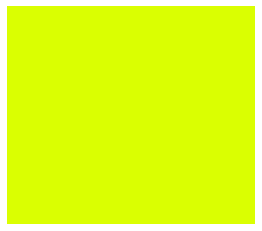

In [490]:
# cargar imagen 

frame = cv2.imread(r"images\rojo.jpg")
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

print(frame.shape)
plt.imshow(frame)
plt.axis("off")

# lectura archivo de coordenadas
with open("img_tools\position.dat", 'r') as archivo:
    coordenadas  = archivo.read()
# Procesar o imprimir el contenido según sea necesario

coordenadas = eval(coordenadas)

coordenada1, coordenada2 = coordenadas
x1, y1 = coordenada1
x2, y2 = coordenada2

#Seleccion de region de interes
imgROI = frame[y1:y2, x1:x2,:]
img2 = imgROI.copy()

plt.imshow(imgROI)
plt.axis("off")


In [491]:
imgHSV = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV )


datoH = imgHSV[:,:,0].mean()   
datoH = datoH *2


print("Valor H:", round(datoH))


Valor H: 68.0


In [492]:
from math import radians, degrees

R = (imgROI[:,:,0]/255).mean()
G = (imgROI[:,:,1]/255).mean()
B = (imgROI[:,:,2]/255).mean()

# R = (imgROI[:,:,0]).mean()
# G = (imgROI[:,:,1]).mean()
# B = (imgROI[:,:,2]).mean()

print("R:", R, "G:", G, "B:", B)
# print("R: ",round(R*255), "G: ", round(G*255), "B: ", round(B*255))


num = 0.5*((R-G) + (R-B))
den = ((R-G)**2 + (R-B)*(G-B))**0.5


H = degrees(np.arccos(num/den))
H = round(H)


if  B>G:
    H =  360 -H

print("Valor inicial de H: ", H)

if H>=0 and H<=180:
    Hcomp = H + 180
else:
    Hcomp = H - 180

if Hcomp == 360:
    Hcomp = 0



print("Color complementario: ", Hcomp)

R: 0.8549019607843138 G: 1.0 B: 0.00392156862745098
Valor inicial de H:  68
Color complementario:  248


In [494]:
I = 1
S = 1

dato = Hcomp

print(R, G, B)

if  dato>= 0 and dato < 120: 
    R_ = I*( 1+ ( (S*np.cos( radians(dato)  ) ) / np.cos( radians(60-dato)  )))
    G_ = 3*I - (R+B)
    B_ = I*(1-S)

elif dato >= 120 and dato <240:
    R_ = I*(1-S)
    G_ = I * ( 1 + (S* np.cos(radians(dato-120)  )) / ( np.cos(radians(180-dato))  ))
    B_ = 3*I - (R+G)

elif dato >= 240 and dato <360:
    R_ = 3*I - (B+G)
    G_ = I*(1-S)
    B_ = I*(1 + (  (S * np.cos(radians(dato-240)  ) ) / ( np.cos(radians(300-dato))) ))

print("RGB complementario", "R:", R_,"G:", G_, "B:", B_)


def maximoValor(R,G,B):
    dato = [R,G,B]
    return max(dato)

maxValue = maximoValor(R_,G_,B_)



R_ = (R_/3)*255
G_ = (G_/3)*255
B_ = (B_/3)*255


R_ = round(min(255, max(0, R_)))
G_ = round(min(255, max(0, G_)))
B_ = round(min(255, max(0, B_)))



print("RGB complementario", "R:", R_,"G:", G_, "B:", B_)



0.8549019607843138 1.0 0.00392156862745098
RGB complementario R: 1.996078431372549 G: 0 B: 2.6084619688405244
RGB complementario R: 170.0 G: 0 B: 222.0


No handles with labels found to put in legend.


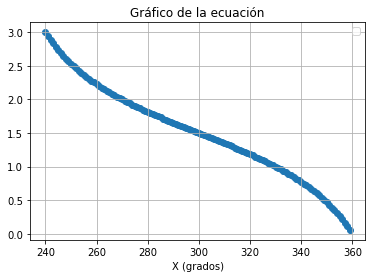

In [487]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import radians

# Definir la ecuación
def calcular_G(I, S, X):
    dato = X
    # return I * (1 + (S * np.cos(radians(X-120))) / (np.cos(radians(180-X))))

    return I*(1 + (  (S * np.cos(radians(dato-240)  ) ) / ( np.cos(radians(300-dato))) ))

# Valores de prueba
I = 1.0
S = 1
X_valores = np.arange(240, 360, 1)  # Cambiado a valores entre 120 y 239

# Calcular los valores de G'
G_valores = calcular_G(I, S, X_valores)

# Crear el gráfico
plt.scatter(X_valores, G_valores)
plt.title('Gráfico de la ecuación')
plt.xlabel('X (grados)')

plt.legend()
plt.grid(True)
plt.show()


In [432]:
print(X_valores.shape)

(120,)


113.27938728299625 113.27938728299625


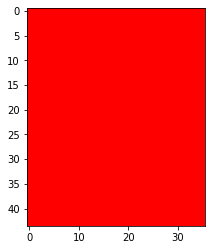

In [29]:
Hcomp = H + sumaAng
plt.imshow(Hcomp, cmap="hsv")
print(np.amax(Hcomp), np.amin(Hcomp))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2.231372549019608
0.0


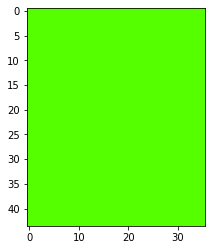

In [30]:
# transofrmacion del espacio hsv a rgb
from math import degrees, radians

imgRGB = np.zeros([tamX,tamY,3])

R_ = np.zeros([tamX,tamY])
G_ = np.zeros([tamX,tamY])
B_ = np.zeros([tamX,tamY])

I = 1
S = 1

for i in range(0,tamX):
    for j in range(0,tamY):

        dato = Hcomp[i,j]
        R = imgROI[i,j,0]/255
        G = imgROI[i,j,1]/255
        B = imgROI[i,j,2]/255

        if  dato < 120: 
            R_ = I*( 1+ ( (S*np.cos(  radians(dato)  ) ) / np.cos( radians(60-dato)  )))
            G_ = 3*I - (R+B)
            B_ = I*(1-S)

        elif dato >= 120 and dato <240:
            R_ = I*(1-S)
            G_ = I * ( 1 + (S* np.cos(radians(dato-120)  )) / ( np.cos(radians(180-dato))  ))
            B_ = 3*I - (R+G)

        elif dato >= 240 and dato <360:
            R_ = 3*I - (B+G)
            G_ = I*(1-S)
            B_ = I*(1 + (  (S + np.cos(radians(dato-240)  ) ) / ( np.cos(radians(300-dato))) ))

        imgRGB[i,j,0] = R_
        imgRGB[i,j,1] = G_
        imgRGB[i,j,2] = B_

print(np.amax(imgRGB))
print(np.amin(imgRGB))

plt.imshow(imgRGB)

In [67]:
print(Hcomp.mean())

242.82745442565343


In [66]:
print("ROJO: ", imgRGB[i,j,0].mean())
print("VERDE: ", imgRGB[i,j,1].mean())
print("AZUL: ", imgRGB[i,j,2].mean())

ROJO:  1.8549019607843138
VERDE:  0.0
AZUL:  4.3108946686063465


In [13]:
from math import degrees
R = 100
G = 125
B = 255

num = 0.5*((R-G) + (R-B))
den = math.sqrt((R-G)**2 + (R-B)*(G-B))
H = degrees(np.arccos(num/den))

print(H)

128.63912217494257


(-0.5, 204.5, 179.5, -0.5)

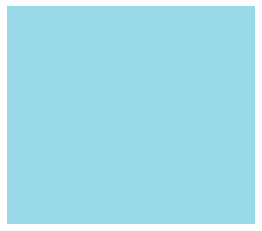

In [ ]:
# lectura archivo de coordenadas
with open("img_tools\position.dat", 'r') as archivo:
    coordenadas  = archivo.read()
# Procesar o imprimir el contenido según sea necesario

coordenadas = eval(coordenadas)

coordenada1, coordenada2 = coordenadas
x1, y1 = coordenada1
x2, y2 = coordenada2

#Seleccion de region de interes
imgROI = frame[y1:y2, x1:x2,:]
img2 = imgROI.copy()

plt.imshow(imgROI)
plt.axis("off")

print(imgROI.shape)

tamX, tamY, _ = imgROI.shape

# Contenedor donde se almacena el cambio de espacio
H = np.zeros([tamX,tamY], dtype = int)
Hcomp = np.zeros([tamX,tamY], dtype=int)


#Transformacion al espacio HSV

for i in range(0,tamX):
    for j in range(0,tamY):
        R = imgROI[i,j,0]/255
        G = imgROI[i,j,1]/255
        B = imgROI[i,j,2]/255

        num = 0.5*((R-G) + (R-B))
        den = math.sqrt((R-G)**2 + (R-B)*(G-B))
        
        if num == 0 and den == 0:
            dato = 0

        else:
            dato = math.degrees(math.acos(num/den))
            dato = dato

        if B>G:
            if dato > 180:
                dato = dato-360  
 
        H[i,j] = dato

print("valor de H:", round(H.mean()))
        

In [1]:
numero = 12
cadena_formateada = str(numero).zfill(3)
print(cadena_formateada)


012


In [3]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QVBoxLayout, QPushButton, QTextEdit, QFileDialog
from PyQt5.QtGui import QImage, QPixmap
import cv2
import numpy as np
import pydicom
from PyQt5.QtCore import Qt
from yQt5 import QtCore


class DICOMEditor(QWidget):
    def __init__(self):
        super().__init__()

        self.init_ui()

    def init_ui(self):
        self.setWindowTitle('DICOM Editor')

        self.image_label = QLabel(self)
        self.image_label.setAlignment(QtCore.Qt.AlignCenter)
        self.image_label.setMinimumSize(400, 400)

        self.note_textedit = QTextEdit(self)
        self.note_textedit.setPlaceholderText("Agregar nota aquí")

        load_save_button = QPushButton('Cargar / Guardar DICOM', self)
        load_save_button.clicked.connect(self.load_or_save_dicom)

        layout = QVBoxLayout()
        layout.addWidget(load_save_button)
        layout.addWidget(self.image_label)
        layout.addWidget(self.note_textedit)

        self.setLayout(layout)

    def load_or_save_dicom(self):
        options = QFileDialog.Options()
        options |= QFileDialog.DontUseNativeDialog

        file_path, _ = QFileDialog.getOpenFileName(self, "Seleccionar Imagen o Guardar como DICOM", "", "Imágenes (*.png *.jpg *.bmp);;Archivos DICOM (*.dcm);;Todos los archivos (*)", options=options)

        if file_path:
            if file_path.lower().endswith(('.png', '.jpg', '.bmp')):
                # Cargar imagen
                image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                self.display_image(image)
            elif file_path.lower().endswith('.dcm'):
                # Guardar como DICOM
                note = self.note_textedit.toPlainText()
                if not note:
                    note = "Sin nota"

                dataset = pydicom.Dataset()
                dataset.PatientName = "Nombre del Paciente"
                dataset.PatientID = "ID del Paciente"
                dataset.Modality = "OTRA"
                dataset.OtherPatientIDs = note

                image_numpy = np.array(image)
                dataset.PixelData = image_numpy.tobytes()
                dataset.Rows, dataset.Columns = image_numpy.shape
                dataset.BitsAllocated = image_numpy.dtype.itemsize * 8
                dataset.SamplesPerPixel = 1
                dataset.BitsStored = image_numpy.dtype.itemsize * 8
                dataset.HighBit = image_numpy.dtype.itemsize * 8 - 1
                dataset.PixelRepresentation = 0

                dataset.save_as(file_path)

    def display_image(self, image):
        if image is not None:
            height, width = image.shape
            bytes_per_line = 1 * width
            q_image = QImage(image.data, width, height, bytes_per_line, QImage.Format_Grayscale8)
            pixmap = QPixmap.fromImage(q_image)
            self.image_label.setPixmap(pixmap)

if __name__ == '__main__':
    app = QApplication(sys.argv)
    editor = DICOMEditor()
    editor.show()
    sys.exit(app.exec_())


: 